# **1. DESCRIPCION DEL PROYECTO**

Este proyecto analiza los resultados completos de las elecciones al Lok Sabha de 2024, obtenidos directamente del sitio web oficial de la Comisión Electoral de la India mediante un script automatizado. La extracción de datos se realizó el 5 de junio de 2024, un día después de la publicación oficial de los resultados.

Tras la limpieza y exploración exhaustiva del conjunto de datos, el objetivo es comprender las tendencias electorales y los factores clave que influyeron en el desenlace. Los datos son auténticos y de acceso público, lo que respalda la validez del análisis. Este proyecto se centra en un riguroso proceso de Exploratory Data Analysis (EDA), acompañado de una revisión bibliográfica detallada que fundamenta cada decisión en el proceso de limpieza y transformación de los datos.

El enfoque en un análisis exploratorio sólido permite identificar las estrategias que llevaron a una **victoria aplastante en las elecciones, proporcionando una visión profunda del panorama electoral.**

El proyecto se encuentra dividido en 7 partes de esta forma facilita la comprensión y familiarización con el proceso.
1. Descripción
2. Diccionario de los datos
3. Información general
4. Limpieza - Preparación de datos.
5. Visualización de datos
6. Analizando estrategia de los 2 partidos lideres
7. Conclusiones
8. Análisis

# **2. DICCIONARIO DE LOS DATOS**

* Constituency = Distrito electoral o circunscripciones ( es una división geográfica del país utilizada para realizar elecciones, tanto a nivel parlamentario como estatal)

* Const. No. = Numero de circunscripción,este numero abarca varios distritos electorales

* Leading Candidate = Candidato Ganador

* Leading Party = Partido Politico Ganador

* Trailing Candidate = Candidato rezagado

* Trailing Party = Partido rezagado

* Margin = Margen de ganancia (se refiere a votos)

* Status = Se refiere del tipo de victoria; resultado declarado(el ganador) o indiscutible(no hubo competencia)


# **3. INFORMACION GENERAL**

In [ ]:
#Importar datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url='https://docs.google.com/spreadsheets/d/1mIHzzrZNte-34Tj9DpYlChWPj4R3LqE058drZqmXRr0/pub?output=csv'
df=pd.read_csv(url)
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [ ]:
#Informacion del df
print(df.info()) # encuentro 1 valor NA en 2 columnas
print(df.duplicated().sum()) #0 duplicados)
print('ANALISIS ESTADISTICO:\n', df.describe()) #Considero que el Margin deberia ser sustituido por un valor int #ademas tengo un valor de "-" que impide mi conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB
None
0
ANALISIS ESTADISTICO:
        Const. No.
count  543.000000
mean    18.178637
std     16.427840
min      1.000000
25%      6.000000
50%     14.000000
75%     25.000000
max     80.000000


In [ ]:
#observando relaciones
print(df.nunique())
print('\nSe aprecia que existen 80 N° de const que encierran 541 nombre de constituency')
print('Existen 42 partidos politcios')

Constituency          541
Const. No.             80
Leading Candidate     542
Leading Party          42
Trailing Candidate    542
Trailing Party         42
Margin                543
Status                  2
dtype: int64

Se aprecia que existen 80 N° de const que encierran 541 nombre de constituency
Existen 42 partidos politcios


In [ ]:
#Analizando el N° de distritos electorales
lista = list(df['Const. No.'].unique())
sorted(lista) #eso quiere decir que tengo valores del 1 al 80 seguidos continuamente, mas no aleatorios

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80]

# **4. LIMPIEZA - PREPARACION DE DATOS**

**4.1. VALORES NA**

---



  Tengo 2 valores nulos, uno en cada columna[Trailing Candidate y Trailing Party].

  No representa una muestra significativa, pero al tratarse de votos del pais con uno de los mayores numero de poblacion del planeta, considero que no es un dato para pasarlo desapercibido

In [ ]:
#Analizar los nulos
nulo = df.isnull()
df.loc[nulo.any(axis=1)]
#1. Me percato que justo en la misma fila esta mis 2 columnas con valores unicos
#2. El status se encuentra en estado indiscutible.
#3. A esta observacion le agrego que Margin tiene como dato "-", esto se interpondra al momento que deseee convertir este dato a int

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
493,Surat,24,MUKESHKUMAR CHANDRAKAANT DALAL,Bharatiya Janata Party,NaN,NaN,-,Uncontested


In [ ]:
#Analizando  Uncontested
estado = df[df['Status']=='Uncontested']
estado
#Algo muy curioso e importante:
  #De las 543 Constituency es la unica que se encuentra en estado indiscutible, eso quiere decir que no tiene competencia
  #Revisando literatura encontramos lo siguiente

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
493,Surat,24,MUKESHKUMAR CHANDRAKAANT DALAL,Bharatiya Janata Party,NaN,NaN,-,Uncontested


*Resultados de las elecciones Lok Sabha 2024: Surat, una de las 26 circunscripciones de Lok Sabha en Gujarat, fue testigo de un acontecimiento electoral único el 22 de abril. Mukesh Dalal, el candidato del Partido Bharatiya Janata (BJP), fue declarado ganador indiscutible después de que todos los demás candidatos, incluido el candidato al Congreso, se retiraran de la carrera.*

*FUENTE: THE ECONOMICS TIMES
    URL: https://economictimes.indiatimes.com/news/elections/lok-sabha/india/surat-election-results-2024-mukesh-dalal-wins-lok-sabha-elections-unopposed-bjp-and-nda-open-account/articleshow/110685994.cms*

In [ ]:
#reemplzao de nulos
df = df.fillna('0') #CON ESTA INFORMACION A LA MANO REEMPLAZARE LOS NA CON 0, DE ESTA FORMA PODRE CONVERTIR MI MARGIN A INT, ADEMAS DARA ENTEDER QUE EN SURAT HUBO 0 COMPETENCIA

In [ ]:
#verificar
df.isna().sum() #me aseguro que mis valores fueron reemplazador por lo que deseo

,0
Constituency,0
Const. No.,0
Leading Candidate,0
Leading Party,0
Trailing Candidate,0
Trailing Party,0
Margin,0
Status,0


**4.2. TIPO DE DATO**

---


Decido transformar Margin para poder trabajar relacion de mayor a menor

In [ ]:
#sutituir "-" de margin con 0
df.loc[493, 'Margin'] = 0

In [ ]:
#conversion de tipo de dato
df['Margin'] = df['Margin'].astype(int)

In [ ]:
df.info() #verifico que el tipo de dato fue cambiado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  543 non-null    object
 5   Trailing Party      543 non-null    object
 6   Margin              543 non-null    int64 
 7   Status              543 non-null    object
dtypes: int64(2), object(6)
memory usage: 34.1+ KB


**4.3. DATOS ATIPICOS - CONSISTENCIA DE VALORES- DUPLICADOS**

---



***LITERATURA***

*La Lok Sabha, la Cámara Baja del Parlamento de la India, está formada por miembros del Parlamento. Cada miembro del parlamento representa una circunscripción geográfica única. Actualmente hay 543 circunscripciones*

*En India, la Lok Sabha (la cámara baja del parlamento) está compuesta por 543 miembros, cada uno de los cuales representa una circunscripción parlamentaria. Estas circunscripciones corresponden a distritos electorales que se dividen según la población, y el número de escaños por estado o territorio se asigna en función de su población relativa.*

*En el contexto de la Lok Sabha, una circunscripción parlamentaria es una división geográfica dentro de un estado o territorio de la India que elige un miembro para la Lok Sabha.*

*Actualmente, India tiene 543 circunscripciones parlamentarias para la Lok Sabha, y cada circunscripción elige un solo miembro para el Parlamento.
Las circunscripciones se determinan con base en la población, de manera que cada circunscripción tenga una población aproximadamente igual. Sin embargo, la delimitación de las circunscripciones puede variar para asegurar una representación justa y adecuada*

*Fuente:
    https://en.wikipedia.org/wiki/List_of_constituencies_of_the_Lok_Sabha
    https://en.wikipedia.org/wiki/2024_Indian_general_election*



**1.  INCONSISTENCIA**

De acuerdo a la literatura revisada, deberia existir 543 Constituency, entonces existe la posibilidad de valores duplicados


In [ ]:
#CADA CIRCUNSCRIPCION ELIGE UN SOLO MIEMBRO POR PARLAMENTO
d= df[df['Leading Candidate'].duplicated()]
d

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared


    Me percato que tengo valores duplicados en la circunscripcion de Wayanad
    Investigare si por circunscripcion se puede elegir candidatos iguales

In [ ]:
duplicado = df[df['Leading Candidate']=='RAHUL GANDHI']
duplicado

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
430,Rae Bareli,36,RAHUL GANDHI,Indian National Congress,DINESH PRATAP SINGH,Bharatiya Janata Party,390030,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared


> DESPUES DE LO INVESTIGADO EL CANDIDATO RAHUL GANDHI GANO EN LOS 2 CIRCUNSCRIPCIONES.

*   *El líder del Congreso, Rahul Gandhi, gana en Rae Bareli, con 6 millones 87 mil 649 votos. Derrotó a Dinesh Pratap Singh, del BJP, por un margen de 3.90.030 votos.*

  *FUENTE: https://timesofindia.indiatimes.com/india/rae-bareli-election-results-2024-congresss-rahul-gandhi-gains-huge-lead-against-bjps-dinesh-pratap-singh/articleshow/110699302.cms*



*  *El ex presidente del Congreso Rahul Gandhi ganó en la circunscripción de  Wayanad Lok Sabha con 647445 votos*

  *FUENTE: https://timesofindia.indiatimes.com/india/wayanad-election-results-2024-kerala-wayanad-lok-sabha-elections-poll-result-updates-rahul-gandhi-cong-k-surendran-bjp/articleshow/110665435.cms*





**2.  INCONSISTENCIA**

In [ ]:
#Duplicados
dd= df[df['Constituency'].duplicated()]
dd

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
42,Aurangabad,37,ABHAY KUMAR SINHA,Rashtriya Janata Dal,SUSHIL KUMAR SINGH,Bharatiya Janata Party,79111,Result Declared
333,Maharajganj,19,"JANARDAN SINGH ""SIGRIWAL""",Bharatiya Janata Party,AAKASH KUMAR SINGH,Indian National Congress,102651,Result Declared


In [ ]:
#ANALIZANDO AURANGABAD
f= df[df['Constituency']=='Aurangabad']
ff= df[df['Constituency']=='Maharajganj']
f

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
41,Aurangabad,19,BHUMARE SANDIPANRAO ASARAM,Shiv Sena,IMTIAZ JALEEL SYED,All India Majlis-E-Ittehadul Muslimeen,134650,Result Declared
42,Aurangabad,37,ABHAY KUMAR SINHA,Rashtriya Janata Dal,SUSHIL KUMAR SINGH,Bharatiya Janata Party,79111,Result Declared


In [ ]:
#ANALIZANDO MAHARAJGANJ
ff

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
332,Maharajganj,63,PANKAJ CHAUDHARY,Bharatiya Janata Party,VIRENDRA CHAUDHARY,Indian National Congress,35451,Result Declared
333,Maharajganj,19,"JANARDAN SINGH ""SIGRIWAL""",Bharatiya Janata Party,AAKASH KUMAR SINGH,Indian National Congress,102651,Result Declared



> DESPUES DE LO INVESTIGADO RESPECTO A LAS CIRCUNSCRIPCIONES Maharajganj Y Aurangabad. RESULTA QUE ESTAS, ESTAN DIVIDIDAS EN ESTADOS. LOS CUALES A VECES TIENEN NOMBRE DE CIRCUNSCRIPCIONES IGUALES, DIFERENCIANDOSE SOLO POR EL Const.No.

  1. Aurangabad	ganador BHUMARE SANDIPANRAO ASARAM pertenece al estado de **Maharashtra**
  2. Aurangabad	ganador ABHAY KUMAR SINHA pertenece al estado de **Bihar**
  3. Maharajganj ganador PANKAJ CHAUDHARY	 pertenece al estado de **Uttar Pradesh**
  4. Maharajganj ganador PANKAJ CHAUDHARY	 pertenece al estado de **Bihar**
  *FUENTE: https://results.eci.gov.in/PcResultGenJune2024/index.htm*


* *En la circunscripción de Aurangabad, se produjo una contienda notable en las elecciones generales indias de 2024. Sandipanrao Bhumare, del Shiv Sena, obtuvo el escaño con 476.130 votos, derrotando a Imtiaz Jaleel Syed, de AIMIM, que recibió 341.480 votos.*

  *FUENTE: https://results.eci.gov.in/PcResultGenJune2024/candidateswise-S1319.htm
    https://www.hindustantimes.com/*

* *En las elecciones generales indias de 2024 para la circunscripción de Maharajganj en Uttar Pradesh, Pankaj Chaudhary, del BJP, salió victorioso, derrotando a su rival más cercano por un margen de más de 35.000 votos*

  *FUENTE: https://www.indiatoday.in/elections/lok-sabha/uttar-pradesh/mahrajganj-constituency-result-24563*




In [ ]:
#PARA PODER TENER UNA VISUALIZACION CORRECTA LE AÑADIRE EL ESTADO MIS FILAS CON Constituency DUPLICADO
df.loc[42, 'Constituency'] = 'Aurangabad - Bihar'
df.loc[333, 'Constituency'] = 'Maharajganj - Bihar'

In [ ]:
df.info() #verifico si todo esta bien

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  543 non-null    object
 5   Trailing Party      543 non-null    object
 6   Margin              543 non-null    int64 
 7   Status              543 non-null    object
dtypes: int64(2), object(6)
memory usage: 34.1+ KB


In [ ]:
df.nunique()

,0
Constituency,543
Const. No.,80
Leading Candidate,542
Leading Party,42
Trailing Candidate,543
Trailing Party,43
Margin,543
Status,2


     identifico 543 Constituency eso quiere decir que si cumple con 543 circunscripciones parlamentarias para la Lok Sabha que muestra mi literatura

# **5. VISUALIZACION DE DATOS**




**5.1. TENDENCIAS DE MARGENES DE VICTORIA Y N° DE CIRCUNSCRIPCIONES**




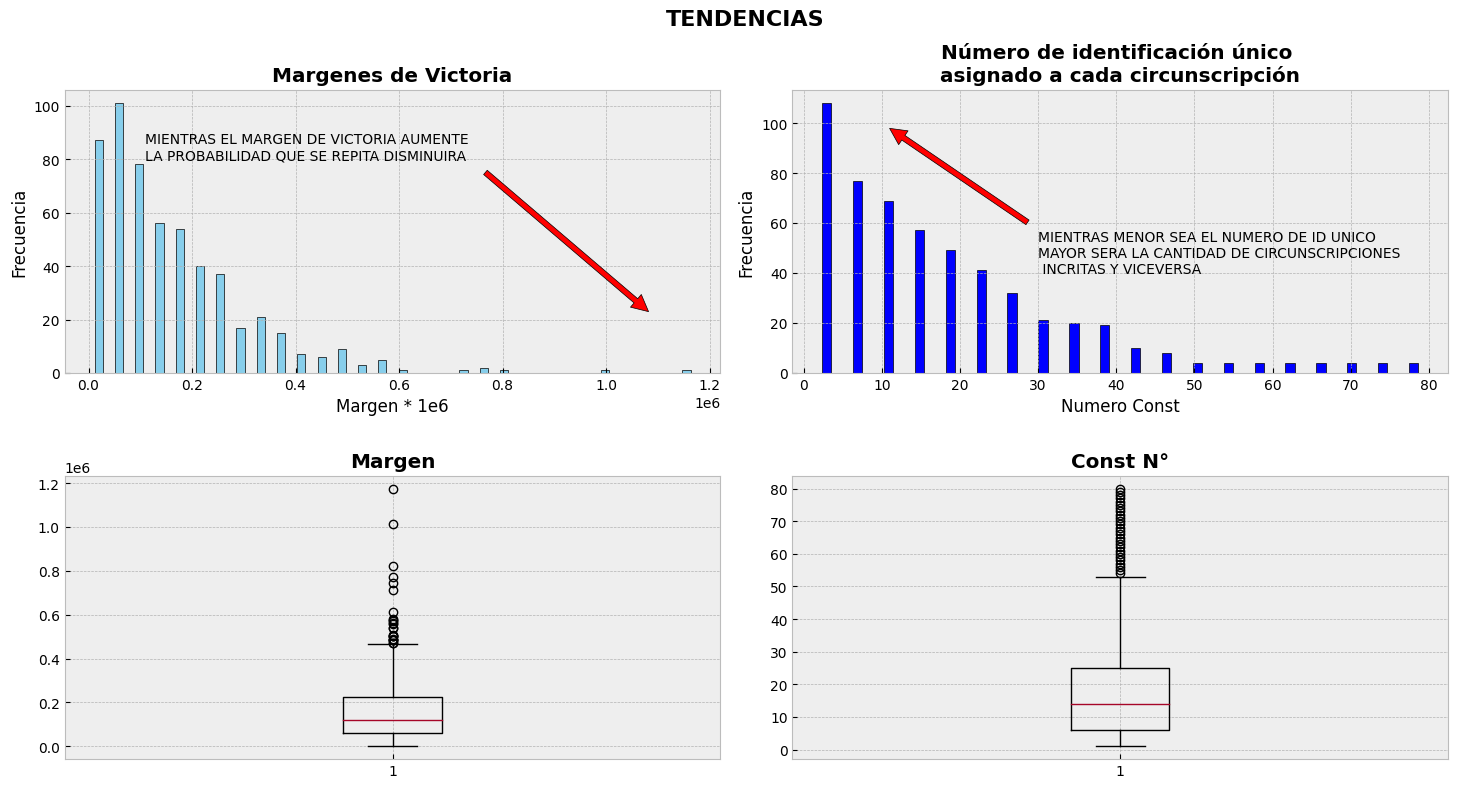

In [ ]:
#VISUALIZAR TENDENCIAS
figura = plt.figure(figsize=(15,8), dpi=(100))
plt.suptitle('TENDENCIAS', fontsize=16, fontweight='bold')
plt.style.use('bmh')

fig= figura.add_subplot(2,2,1)
plt.hist(df['Margin'], bins=30, color='skyblue', edgecolor='black', density=False, rwidth=0.4)
fig.set_title('Margenes de Victoria', fontweight='bold')
fig.set_xlabel('Margen * 1e6')
fig.set_ylabel('Frecuencia')
fig.annotate("MIENTRAS EL MARGEN DE VICTORIA AUMENTE \nLA PROBABILIDAD QUE SE REPITA DISMINUIRA",
           xy=(1100000, 20), xytext=(110000, 80), arrowprops=dict(facecolor='red', edgecolor='black',shrink=0.05))

fig2= figura.add_subplot(2,2,2)
fig2.hist(df['Const. No.'], bins= 20, color='blue', edgecolor='black', density=False, rwidth=0.3)
fig2.set_title('Número de identificación único \nasignado a cada circunscripción', fontweight='bold')
fig2.set_xlabel('Numero Const')
fig2.set_ylabel('Frecuencia')
fig2.annotate("MIENTRAS MENOR SEA EL NUMERO DE ID UNICO\nMAYOR SERA LA CANTIDAD DE CIRCUNSCRIPCIONES\n INCRITAS Y VICEVERSA",
           xy=(10, 100), xytext=(30, 40), arrowprops=dict(facecolor='red', edgecolor='black',shrink=0.05))

fig2= figura.add_subplot(2,2,3)
fig2.boxplot(df['Margin'])
fig2.set_title('\nMargen', fontweight='bold')

fig2= figura.add_subplot(2,2,4)
fig2.boxplot(df['Const. No.'])
fig2.set_title('\nConst N°', fontweight='bold')

plt.savefig('tendencias.png')
plt.tight_layout()
plt.show()

    MARGEN: Se observa que en su mayoria obtuvo un margen de victoria entre los 10'000 y 200'000. Existen margenes muy superiores pero su frecuencia es minima

    NUMERO const: Se observa que mientras menor sea el numero Id de circunscripcion mayor sera la cantidad de circunscripcioens inscritas.  Obteniendo una realacion inversamente proporcional

**5.2. MARGEN DE GANACIA POR N° DE CIRCUNSCRIPCIONES**

<ipython-input-21-5e5f50d13982>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,  x='Const. No.', y='Margin', palette='husl')


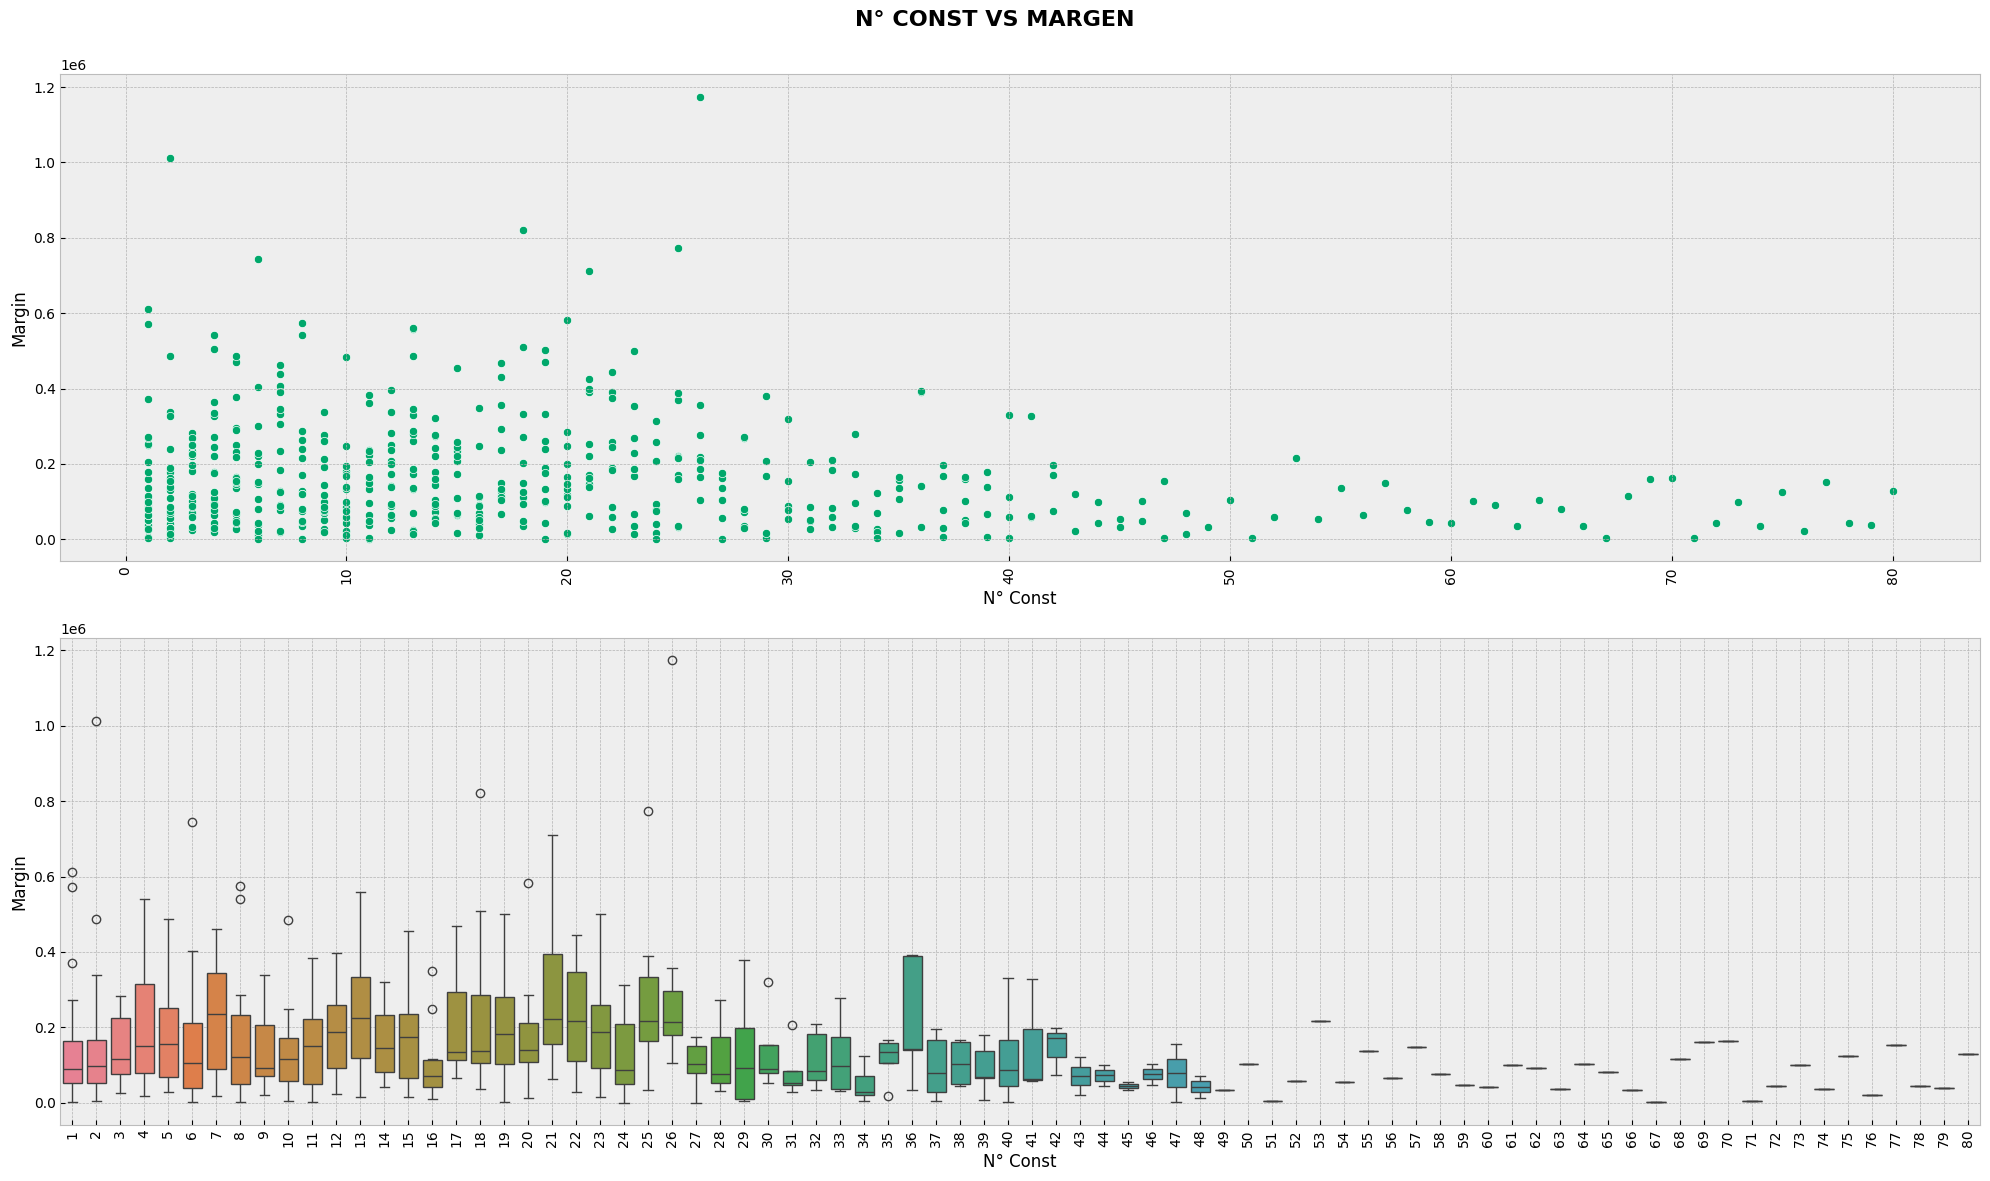

In [ ]:
#N° CIRCUNSCRIPCIONES VS MARGEN
plt.figure(figsize=(20,12), dpi=(100))
plt.suptitle('N° CONST VS MARGEN\n', fontweight='bold', fontsize=16)
plt.style.use('bmh')

plt.subplot(2,1,1)
sns.scatterplot(df,  x='Const. No.', y='Margin', color='#00A86B')
plt.xticks(rotation=90)
plt.xlabel('N° Const')
plt.ylabel('Margin')

plt.subplot(2,1,2)
sns.boxplot(df,  x='Const. No.', y='Margin', palette='husl')
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel('N° Const')
plt.ylabel('Margin')

plt.tight_layout()
plt.show()


    Se observa una fuerte dispersion de valores mas altos en los n°const menores a 30, que justamente son los que mas circunscripciones tienen inscritos. Siendo el N° const. 26 y 2 con los valores mas altos
    Eso quiere decir que los partidos que tienen la delantera en el rango de 0-30 de n°const tienen la victoria practicamente asegurada

**5.3. NUMERO DE VOTOS Y PORCENTAJE POR PARTIDO POLITICO**

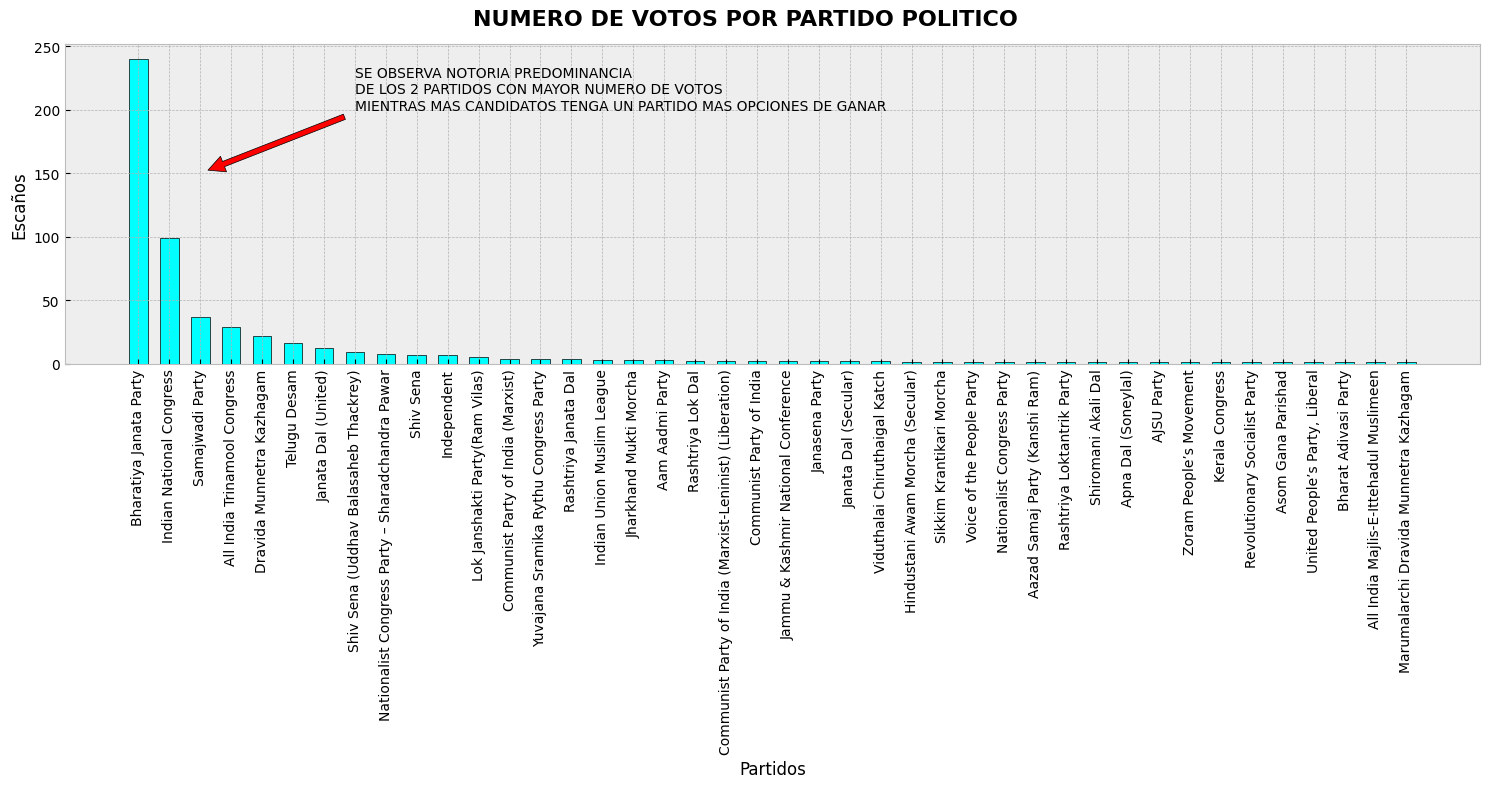

In [ ]:
#VOTOS POR PARTIDO POLITICO
partido = df['Leading Party'].value_counts()
candidatos = df.groupby('Leading Party')['Leading Candidate'].count()

graficoo= plt.figure(figsize=(15,8), dpi=(100))
plt.suptitle('NUMERO DE VOTOS POR PARTIDO POLITICO', fontweight='bold', fontsize=16)
plt.style.use('bmh')

c= graficoo.add_subplot(1,1,1)
c.bar(partido.index, partido.values, width=0.6, edgecolor='black', color='cyan')
plt.xticks(rotation=90)
c.set_xlabel('Partidos')
c.set_ylabel('Escaños')
c.annotate("SE OBSERVA NOTORIA PREDOMINANCIA \nDE LOS 2 PARTIDOS CON MAYOR NUMERO DE VOTOS \nMIENTRAS MAS CANDIDATOS TENGA UN PARTIDO MAS OPCIONES DE GANAR",
           xy=(2, 150), xytext=(7, 200), arrowprops=dict(facecolor='red', edgecolor='black',shrink=0.05))

plt.savefig('votos_partidos.png')
plt.tight_layout()
plt.show()


    -Escojo la frecuencia de los partidos politicos, por que en candidatos todos solo pueden postular 1 vez por 2
    -Existe una clara preferencia por 2 partidos politicos: "Bharatiya Janata Party" y "Indian National Congress

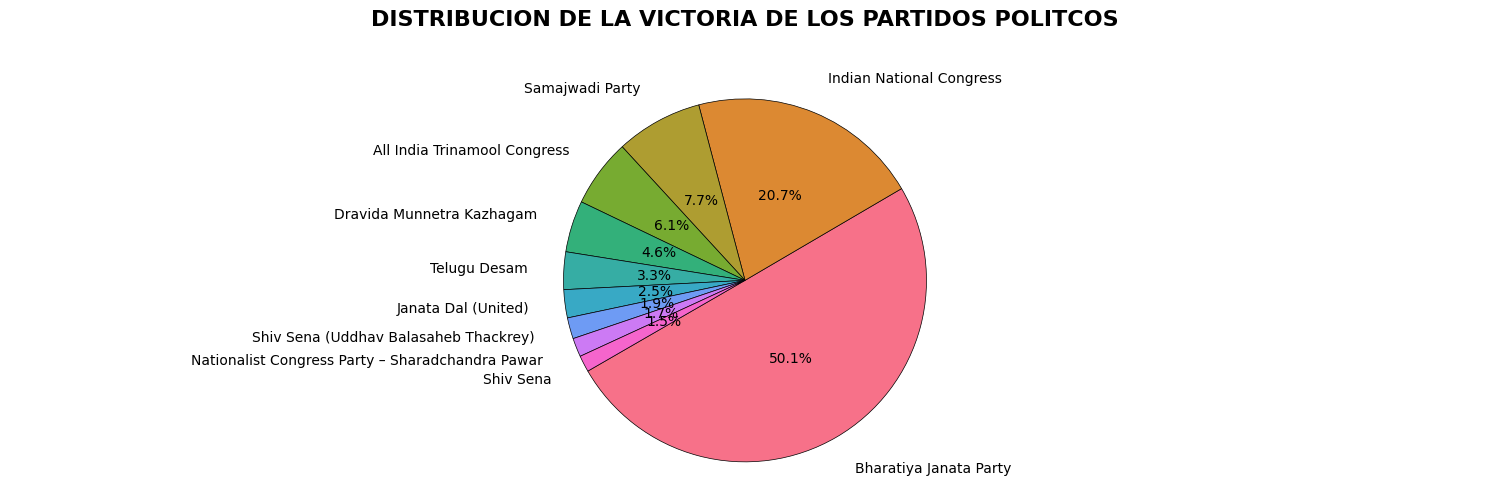

In [ ]:
#PORCENTAJE DE GANACIAS
politico = partido.head(10)
colores = sns.color_palette('husl', len(politico))
plt.style.use('bmh')
q= plt.figure(dpi=(100), figsize=(15,5))
ax1 =q.add_subplot(1,1,1)
ax1.pie(politico.values, labels=politico.index, autopct='%.1f%%', shadow=False,
        startangle=210, pctdistance=0.5, labeldistance=1.2, colors=colores,
        wedgeprops=dict(edgecolor='black'))
ax1.axis("equal")
ax1.set_title('DISTRIBUCION DE LA VICTORIA DE LOS PARTIDOS POLITCOS\n\n',fontweight='bold', fontsize=16)
plt.savefig('votos_partidos_porcentaje.png')
plt.tight_layout()
plt.show()

    Se observa una aplastante distribicion de los partidos lideres Bharatiya Janata Party(50%) e Indian National Congress(21%), claramente se sabe quien gobernara

# **6. ANALIZANDO ESTRATEGIA DE LOS 2 PARTIDOS LIDERES**

---



**6.1. COMPARAR TODOS LOS PARTIDOS CON EL N° DE CIRCUNSCRIPCIONES VS MARGIN**

<ipython-input-24-9d613e9a209f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ordenado, x='Leading Party', y='Const. No.', palette='husl')
<ipython-input-24-9d613e9a209f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ordenado, x='Leading Party', y='Margin', palette='husl')


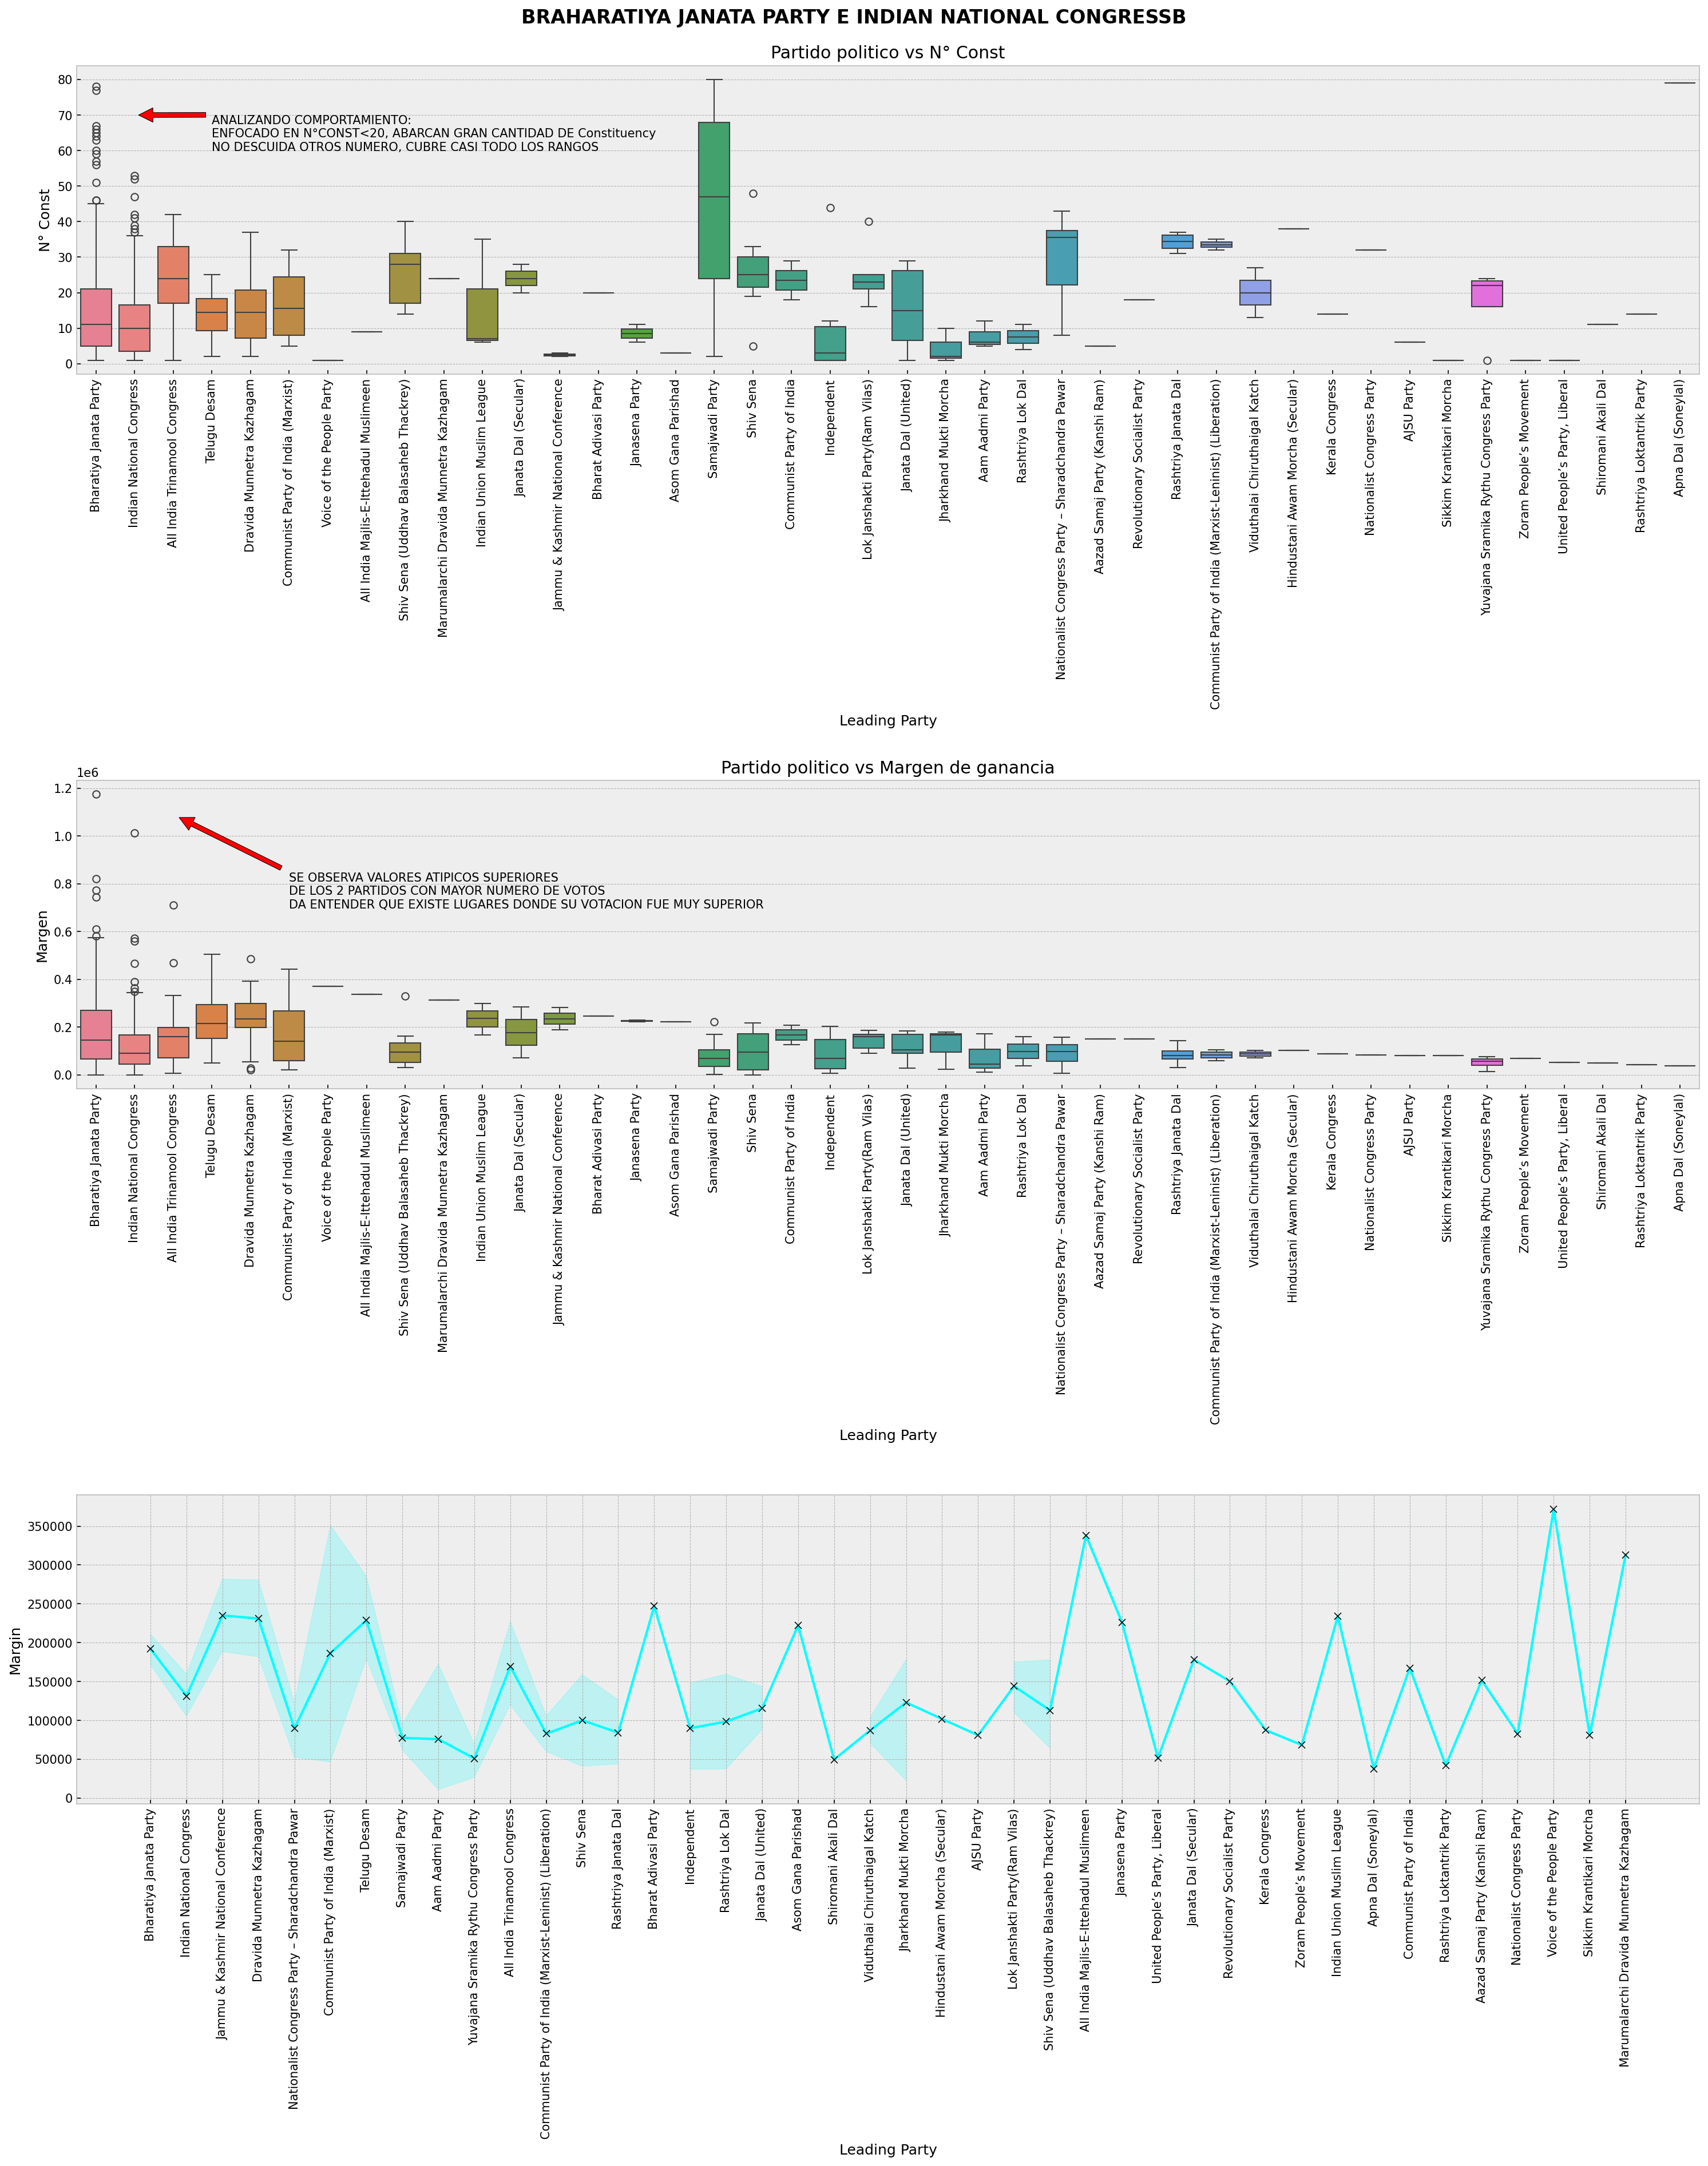

In [ ]:
#Bharatiya Janata Party(50%) e Indian National Congress(21%)
ordenado = df.sort_values(by='Margin', ascending=False)

plt.figure(figsize=(20,30), dpi=(150))
plt.suptitle('BRAHARATIYA JANATA PARTY E INDIAN NATIONAL CONGRESSB\n\n', fontweight='bold', fontsize=16)
plt.style.use('bmh')

plt.subplot(4,1,1)
plt.title('Partido politico vs N° Const')
sns.boxplot(data=ordenado, x='Leading Party', y='Const. No.', palette='husl')
plt.xticks(rotation=90)
plt.ylabel('N° Const')
plt.annotate("ANALIZANDO COMPORTAMIENTO:\nENFOCADO EN N°CONST<20, ABARCAN GRAN CANTIDAD DE Constituency\nNO DESCUIDA OTROS NUMERO, CUBRE CASI TODO LOS RANGOS ",
           xy=(1, 70), xytext=(3, 60), arrowprops=dict(facecolor='red', edgecolor='black', shrink=0.05))

plt.subplot(4,1,2)
plt.title('\nPartido politico vs Margen de ganancia')
sns.boxplot(data=ordenado, x='Leading Party', y='Margin', palette='husl')
plt.xticks(rotation=90)
plt.ylabel('Margen')
plt.annotate("SE OBSERVA VALORES ATIPICOS SUPERIORES\nDE LOS 2 PARTIDOS CON MAYOR NUMERO DE VOTOS \nDA ENTENDER QUE EXISTE LUGARES DONDE SU VOTACION FUE MUY SUPERIOR ",
           xy=(2, 1090000), xytext=(5, 700000), arrowprops=dict(facecolor='red', edgecolor='black', shrink=0.05))

plt.subplot(4,1,3)
sns.lineplot(data=df, x='Leading Party', y='Margin',color='cyan', marker='x',markeredgecolor='black', markerfacecolor='black')
plt.xticks(rotation=90)
c.set_xlabel('Partidos')
c.set_ylabel('Escaños')

plt.savefig('Partidos_vs_n°const.png')
plt.tight_layout()
plt.show()

    Existe una estrategia en los partidos victorioso:
    -Abarcan casi todos los rango de N° Const, esto es crucial, ya que estos encierran las cincunscripciones
    A su vez, su distribucion se enfoca en lo N°cont minimo, estos contienen el mayor numero de circunscripciones, una estrategia sutil
    Los margenes de victoria mas altos se encuentran dentro de ellos
    -En el tercer grafico observamos que en promedio el margen de victoria es medio, eso quiere decir que en la mayoria de circunscripciones ganaraon pero aun existe desacuerdo por otros candiadtos

**6.2. ANALISIS DE LOS 2 PARTIDOS GANADORES CON EL N°DE CIRCUNSCRIPCIONES**

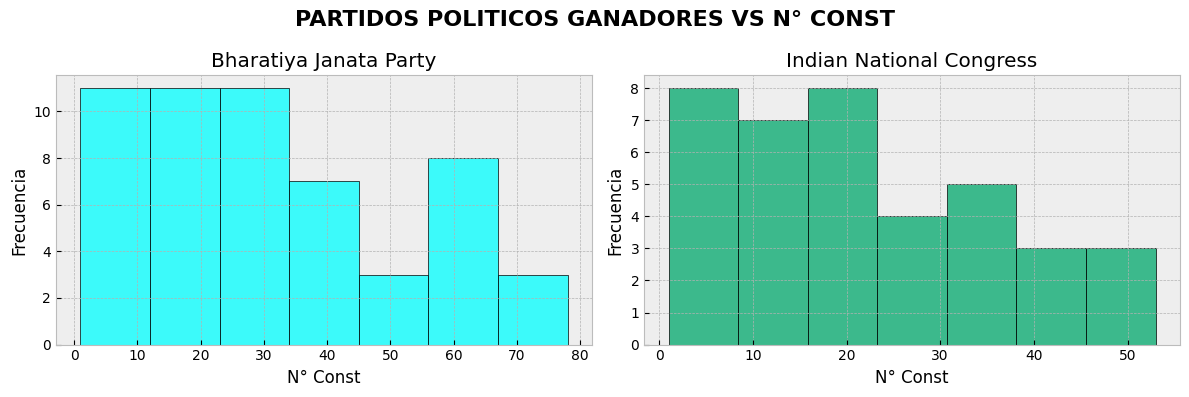

In [ ]:
#ANALISIS DE Bharatiya Janata Party(50%) e Indian National Congress(21%)
game = df[df['Leading Party'].isin(["Bharatiya Janata Party","Indian National Congress"])]
n = game.groupby(['Leading Party','Const. No.']).size().reset_index()
n1 = n[n['Leading Party'] == 'Bharatiya Janata Party']
n2 = n[n['Leading Party'] == 'Indian National Congress']

plt.figure(dpi=100, figsize=(12,4))
plt.suptitle('PARTIDOS POLITICOS GANADORES VS N° CONST', fontweight='bold', fontsize=16)
plt.subplot(1,2,1)
sns.histplot(data=n1, x='Const. No.', edgecolor='black', color='cyan')
plt.title('Bharatiya Janata Party')
plt.xlabel('N° Const')
plt.ylabel('Frecuencia')

plt.subplot(1,2,2)
sns.histplot(data=n2, x='Const. No.', edgecolor='black',color='#00A86B')
plt.title('Indian National Congress')
plt.xlabel('N° Const')
plt.ylabel('Frecuencia')

plt.savefig('2partidos_ganadores.png')
plt.tight_layout()
plt.show()


    Mirando mas de cerca la distribucion de los partidos ganadores:
    Esta super claro que BHARATIYA JANATA se enfoco en los numeros minimo de N°Cont, muy buena estrategia ya que estos encierran gran cantidad de Constituency.
    No solo se basto con eso, sino que se ocupo de cubrir todos los rango de N°Const, esto garantaciaria una aplastante victoria

# **7. CONCLUSIONES**


*    Se encontraron 2 inconsistencias que contenian valores atipicos, circuncripciones que tenian el mismo nombre pero pertenecian a diferente region. No se pudo pasar desapercibido esta observacion, ya que estamos hablando de uno de los paises mas poblado del mundo.
Se sustituyo por el nombre y la region:  'Aurangabad - Bihar'
y 'Maharajganj - Bihar'


**TENDENCIAS**

1. MARGEN DE VICTORIA, existe relación inversamente proporcional, mientras aumenta el margen de ganancia, la probabilidad que se repita es menor.

  Dentro del margen se observa la mayor parte de datos entre los 10'000 y 200'000 votos

2. N° CONSTITUENCY, existe relación inversamente proporcional, mientras menor sea en N°Const mayor será la cantidad de distritos inscritos.

3. Los mayores márgenes y cantidades de nombre de circunscripciones se encuentran claramente entre los números de circunscripción menores a 30. Resaltando el 2 y 26 con los márgenes de victoria mas altos

4. Se observa una avasallante victoria por parte de 2 partidos políticos  "Bharatiya Janata Party" con 50% e "Indian National Congress con 21%

# **8. ANALISIS**


**¿CUAL FUE LA ESTRATEGIAS DE LA VICTORIA?**

Se resalta en enfoque del partido Bharatiya Janata Party:

1. Como se sabe los N° de const mas bajos contienen mayor cantidad de circunscripciones, por esta razón el partido mencionado se centro en obtener márgenes de victoria en los 30 primeros números, de esta forma llevar delantera

2. Lo curioso es que se encargo de llenar todos los rango de N° de circunscripción con candidatos de este partido, así asegurar estar presente en diferentes lugares, a comparación de otros partidos donde no tenían candidatos en todos los N° de circunscripción